# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
#import signnames.csv which contains information about label
sign_name = {}
with open('signnames.csv', mode = 'r') as f:
    next(f)
    for line in f:
        splited_line = line.split(',')
        sign_name[int(splited_line[0])] = splited_line[1]

In [5]:
# separate the indices of each traffic sign in the train set and store it in indices_of_label 
indices_of_label = {}
for i in range(43):
    indices_of_label[i] = []
for i in range(len(y_train)):
    indices_of_label[y_train[i]].append(i)

num_of_label = [len(indices_of_label[i]) for i in range(43)]

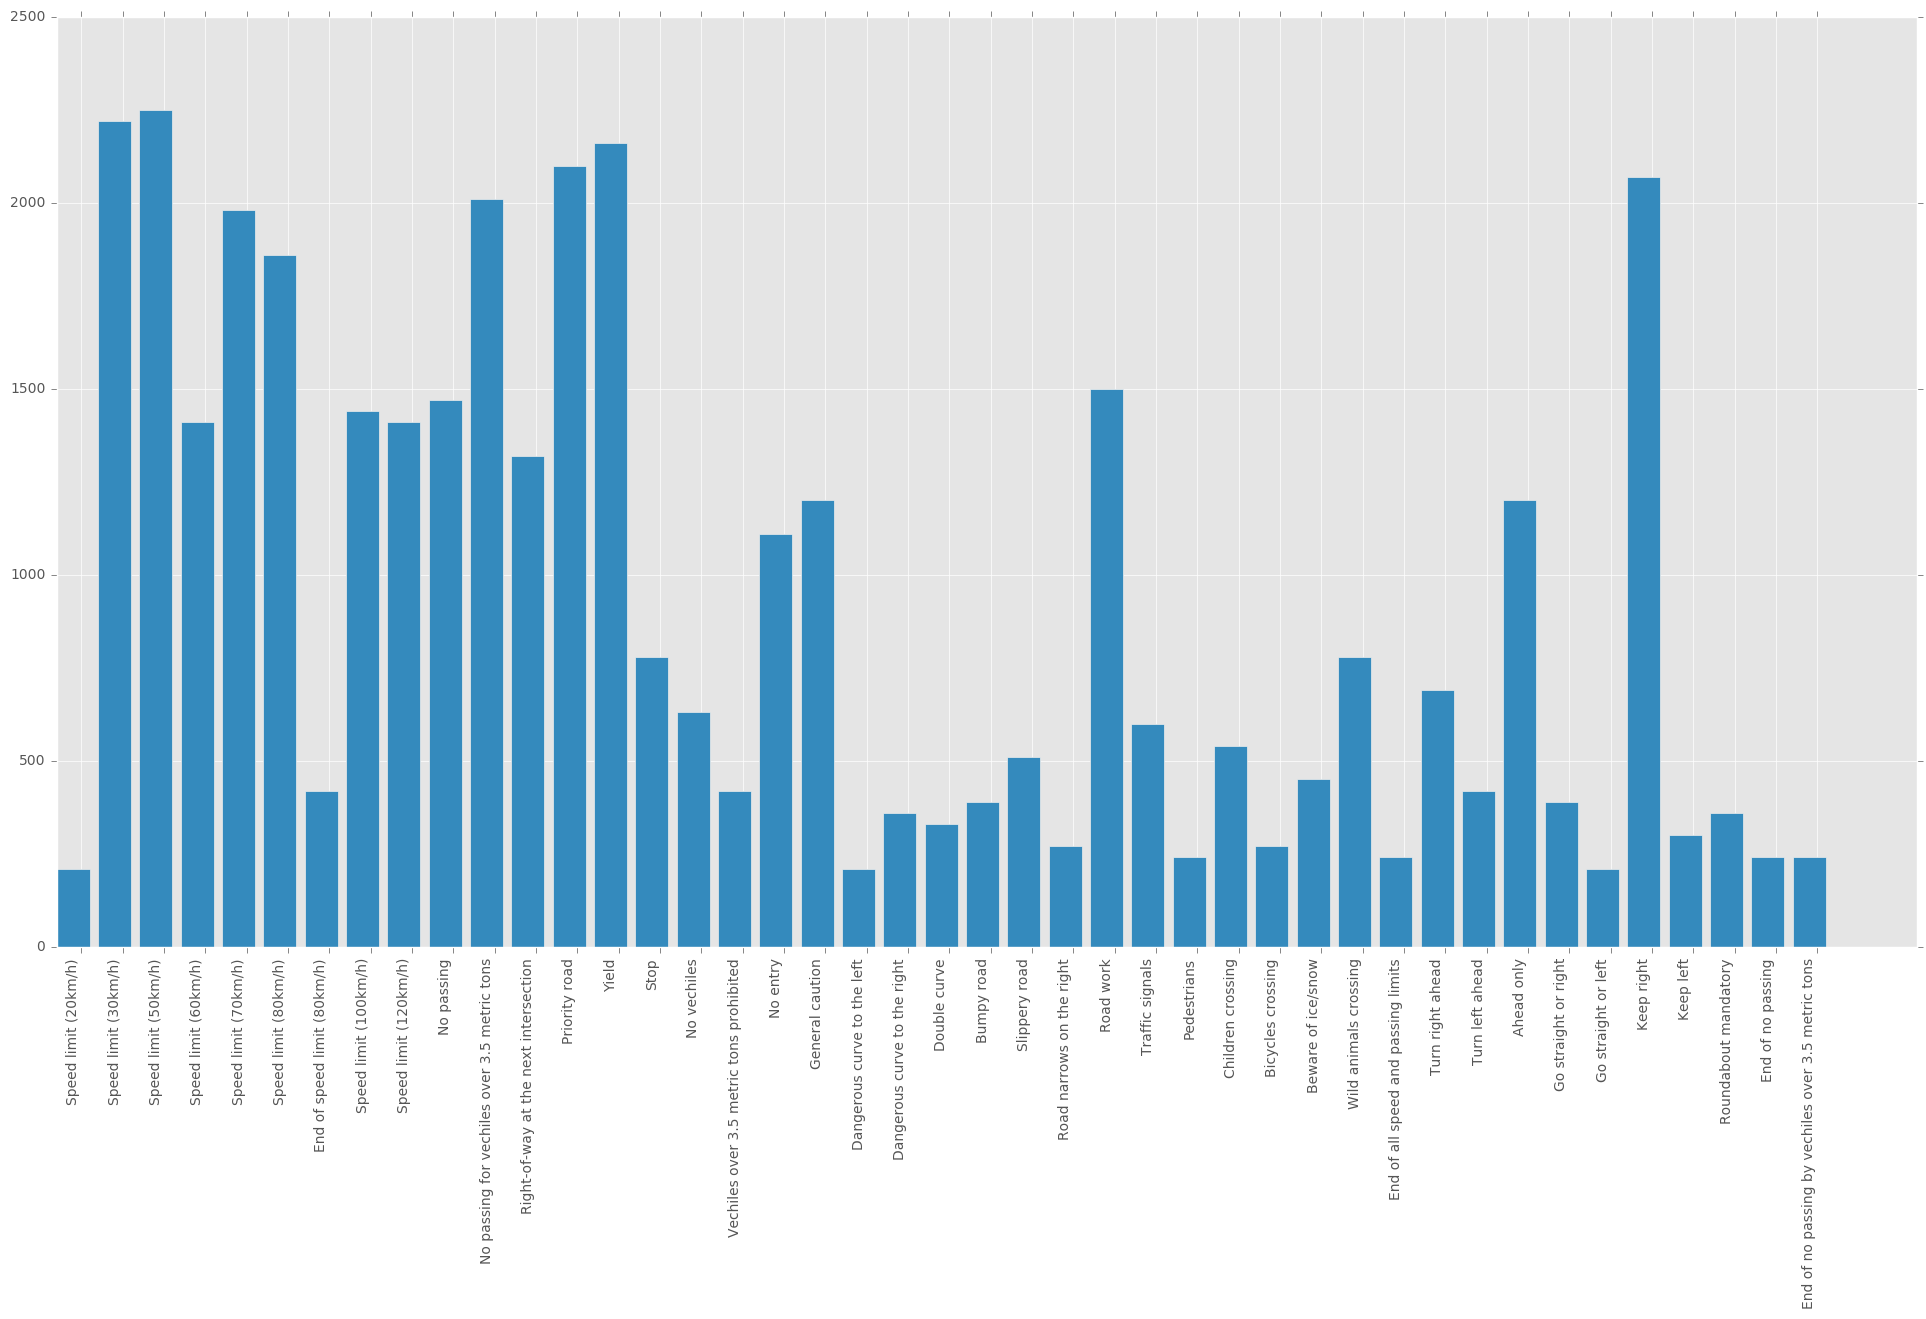

In [6]:
# Plot number of each traffic sign in train set
import numpy as np
fig, ax = plt.subplots(figsize = (24, 12) )
plt.bar(range(43), num_of_label);
plt.xticks(np.arange(43) + 0.6 , [sign_name[i] for i in range(43)], rotation='vertical', fontsize = 10);


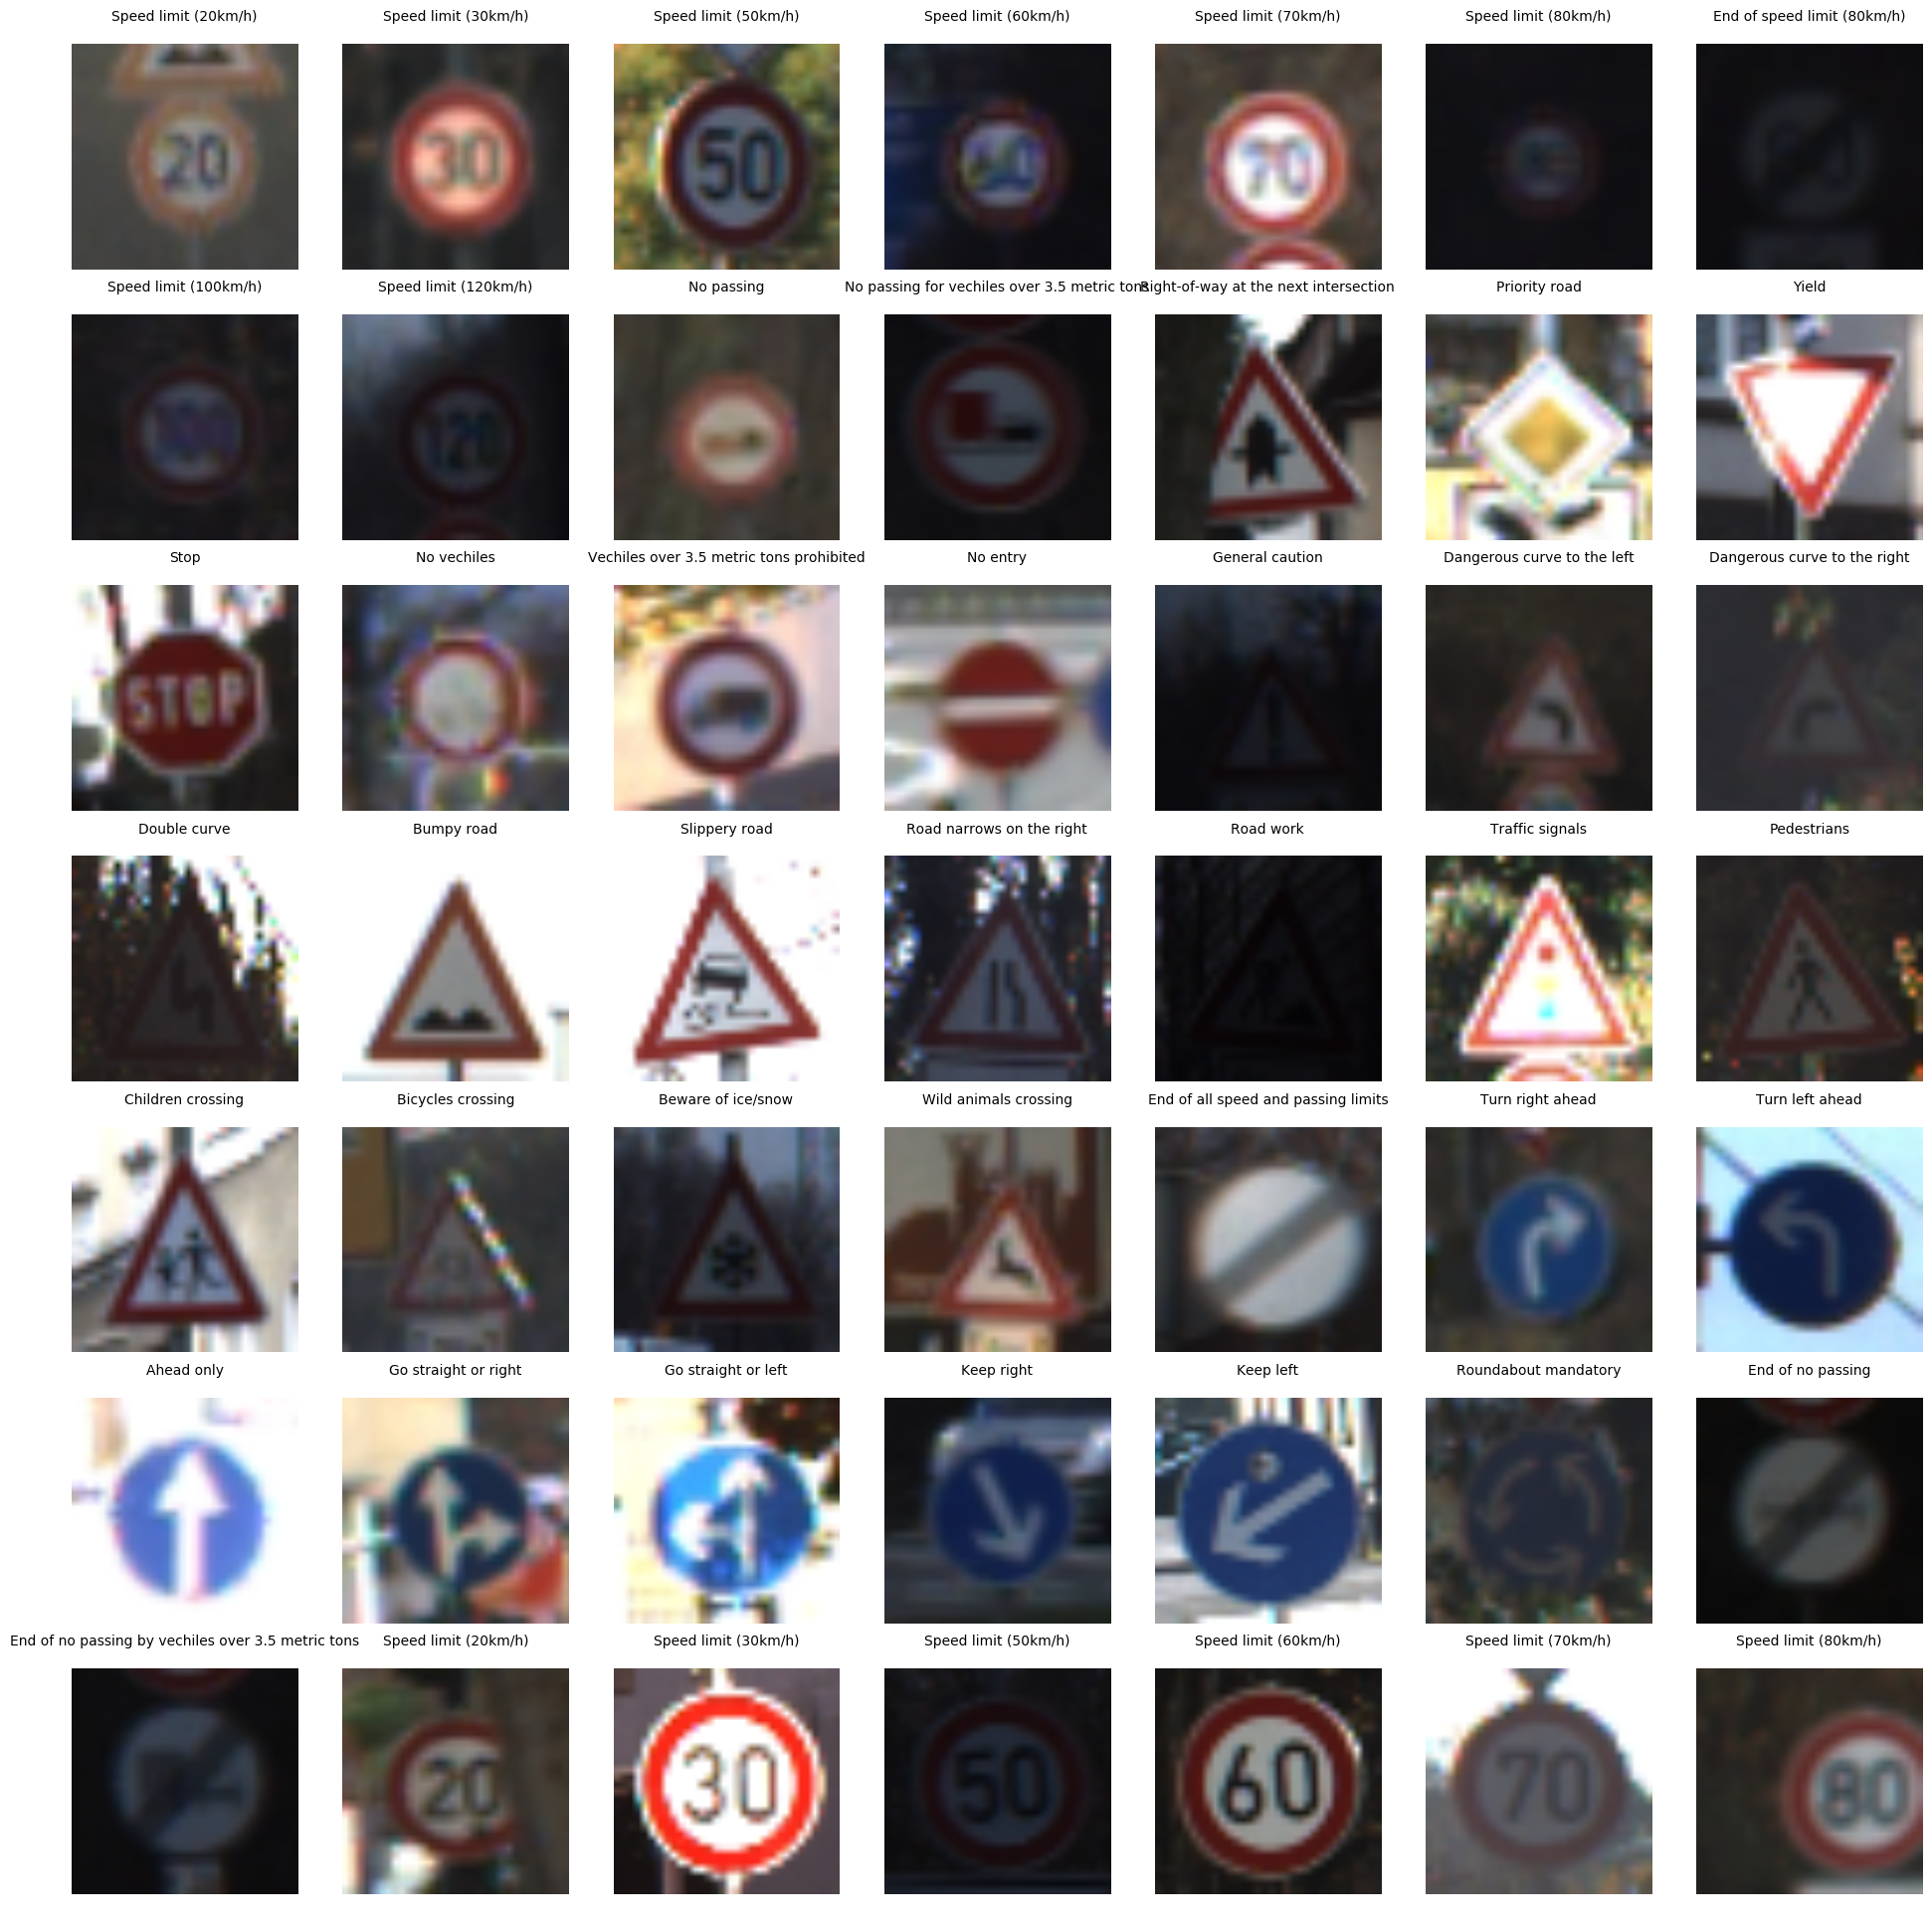

In [7]:
# Randomly choose and plot traffic sign images
fig, axes = plt.subplots(7,7, figsize = (24, 24))
plt.axis('off')
for i in range(49):
    idx = np.random.choice(indices_of_label[i%43])
    axes.flat[i].imshow(X_train[idx])
    axes.flat[i].set_title(sign_name[i%43], fontsize = 10)
    axes.flat[i].axis('off')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

This is the answer for both question 1 and 2.

Using OpenCV, I converted all image in both train and test data to YUV and applied Contrast Limited Adaptive Histogram Equalization to Y channel then converted back the images to RGB. This will improve contrast in all images. 

Then, I randomly took 20% data of each traffic sign to form a validation set.

After that, I used input pipeline of tensorflow to process and generate more data as follows:
   + Cropped the images to 28*28*3, randomly for training centrally for evaluation.
   + Randomly adjusted the brightness and contrast for training. 
   + Subtracted off the mean and divide by the variance of the pixels to make the model insensitive to dynamic range

Since these process is done in the input pipeline, new data are constantly generated during training. This will make the model more robust.



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is

![model](./model.png)

where each block is designed as follows

![block](./block.png)

Also, L2 regularization is applied for the fully connected layer FC

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used Adam optimizer with initial learning rate is 0.001. Learing rate reduced by a decay rate 0.9 after each decay step 100. The batch size is 512, all the dropout probability is of 0.5 and the regularization coefficient for FC is 0.004. All the variales are initiated by Xavier initiation.    

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

This architecture is inspired by inception model: each clock is formed by conctenating two sequences of convolution net, and let the training process decide which sequence is better for the classification.

Below is the process I took to come up with this final model
+ I started with a sequences of block of the form: ... + conv 3*3 + ReLu + conv 3*3 + Relu + Maxpool + ... follows by two fully connected layers. Without any data preprocessing, this type of model brought me 100% accuracy on the train set, 99% acc on val set but only 94-95% acc on test set. It seem that the model learnt so much irrelevant feature and became overfitting.
+ From each image, by randomly rotating and transforming, I generated 5 more images before training. This brough me 96% on the test set.
+ I then used input pipeline of tensorflow and modified the model by concatening two sequences of cov nets. This time, I got 97-98% on the test set.
+ I then added dropout, and used L2 regularization for fully connected layer. Consequently, the test accuracy inceased to ~99%
+ I tried batch normalization and Adaptive Histogram Equalization, It didn't bring the improvement for the test acc. But It make the trainining process converge faster.   


In [8]:
# Apply Contrast_Limited_Adaptive_Histogram_Equalization to Y channel of all images of both train and test set
import cv2
def process(img):
    yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    y = yuv[:,:,0]
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(3,3))
    y_ = clahe.apply(y)
    yuv[:,:,0] = y_
    img_ = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    return img_

X_train = np.array([process(img) for img in X_train ])
X_test =  np.array([process(img) for img in X_test ])

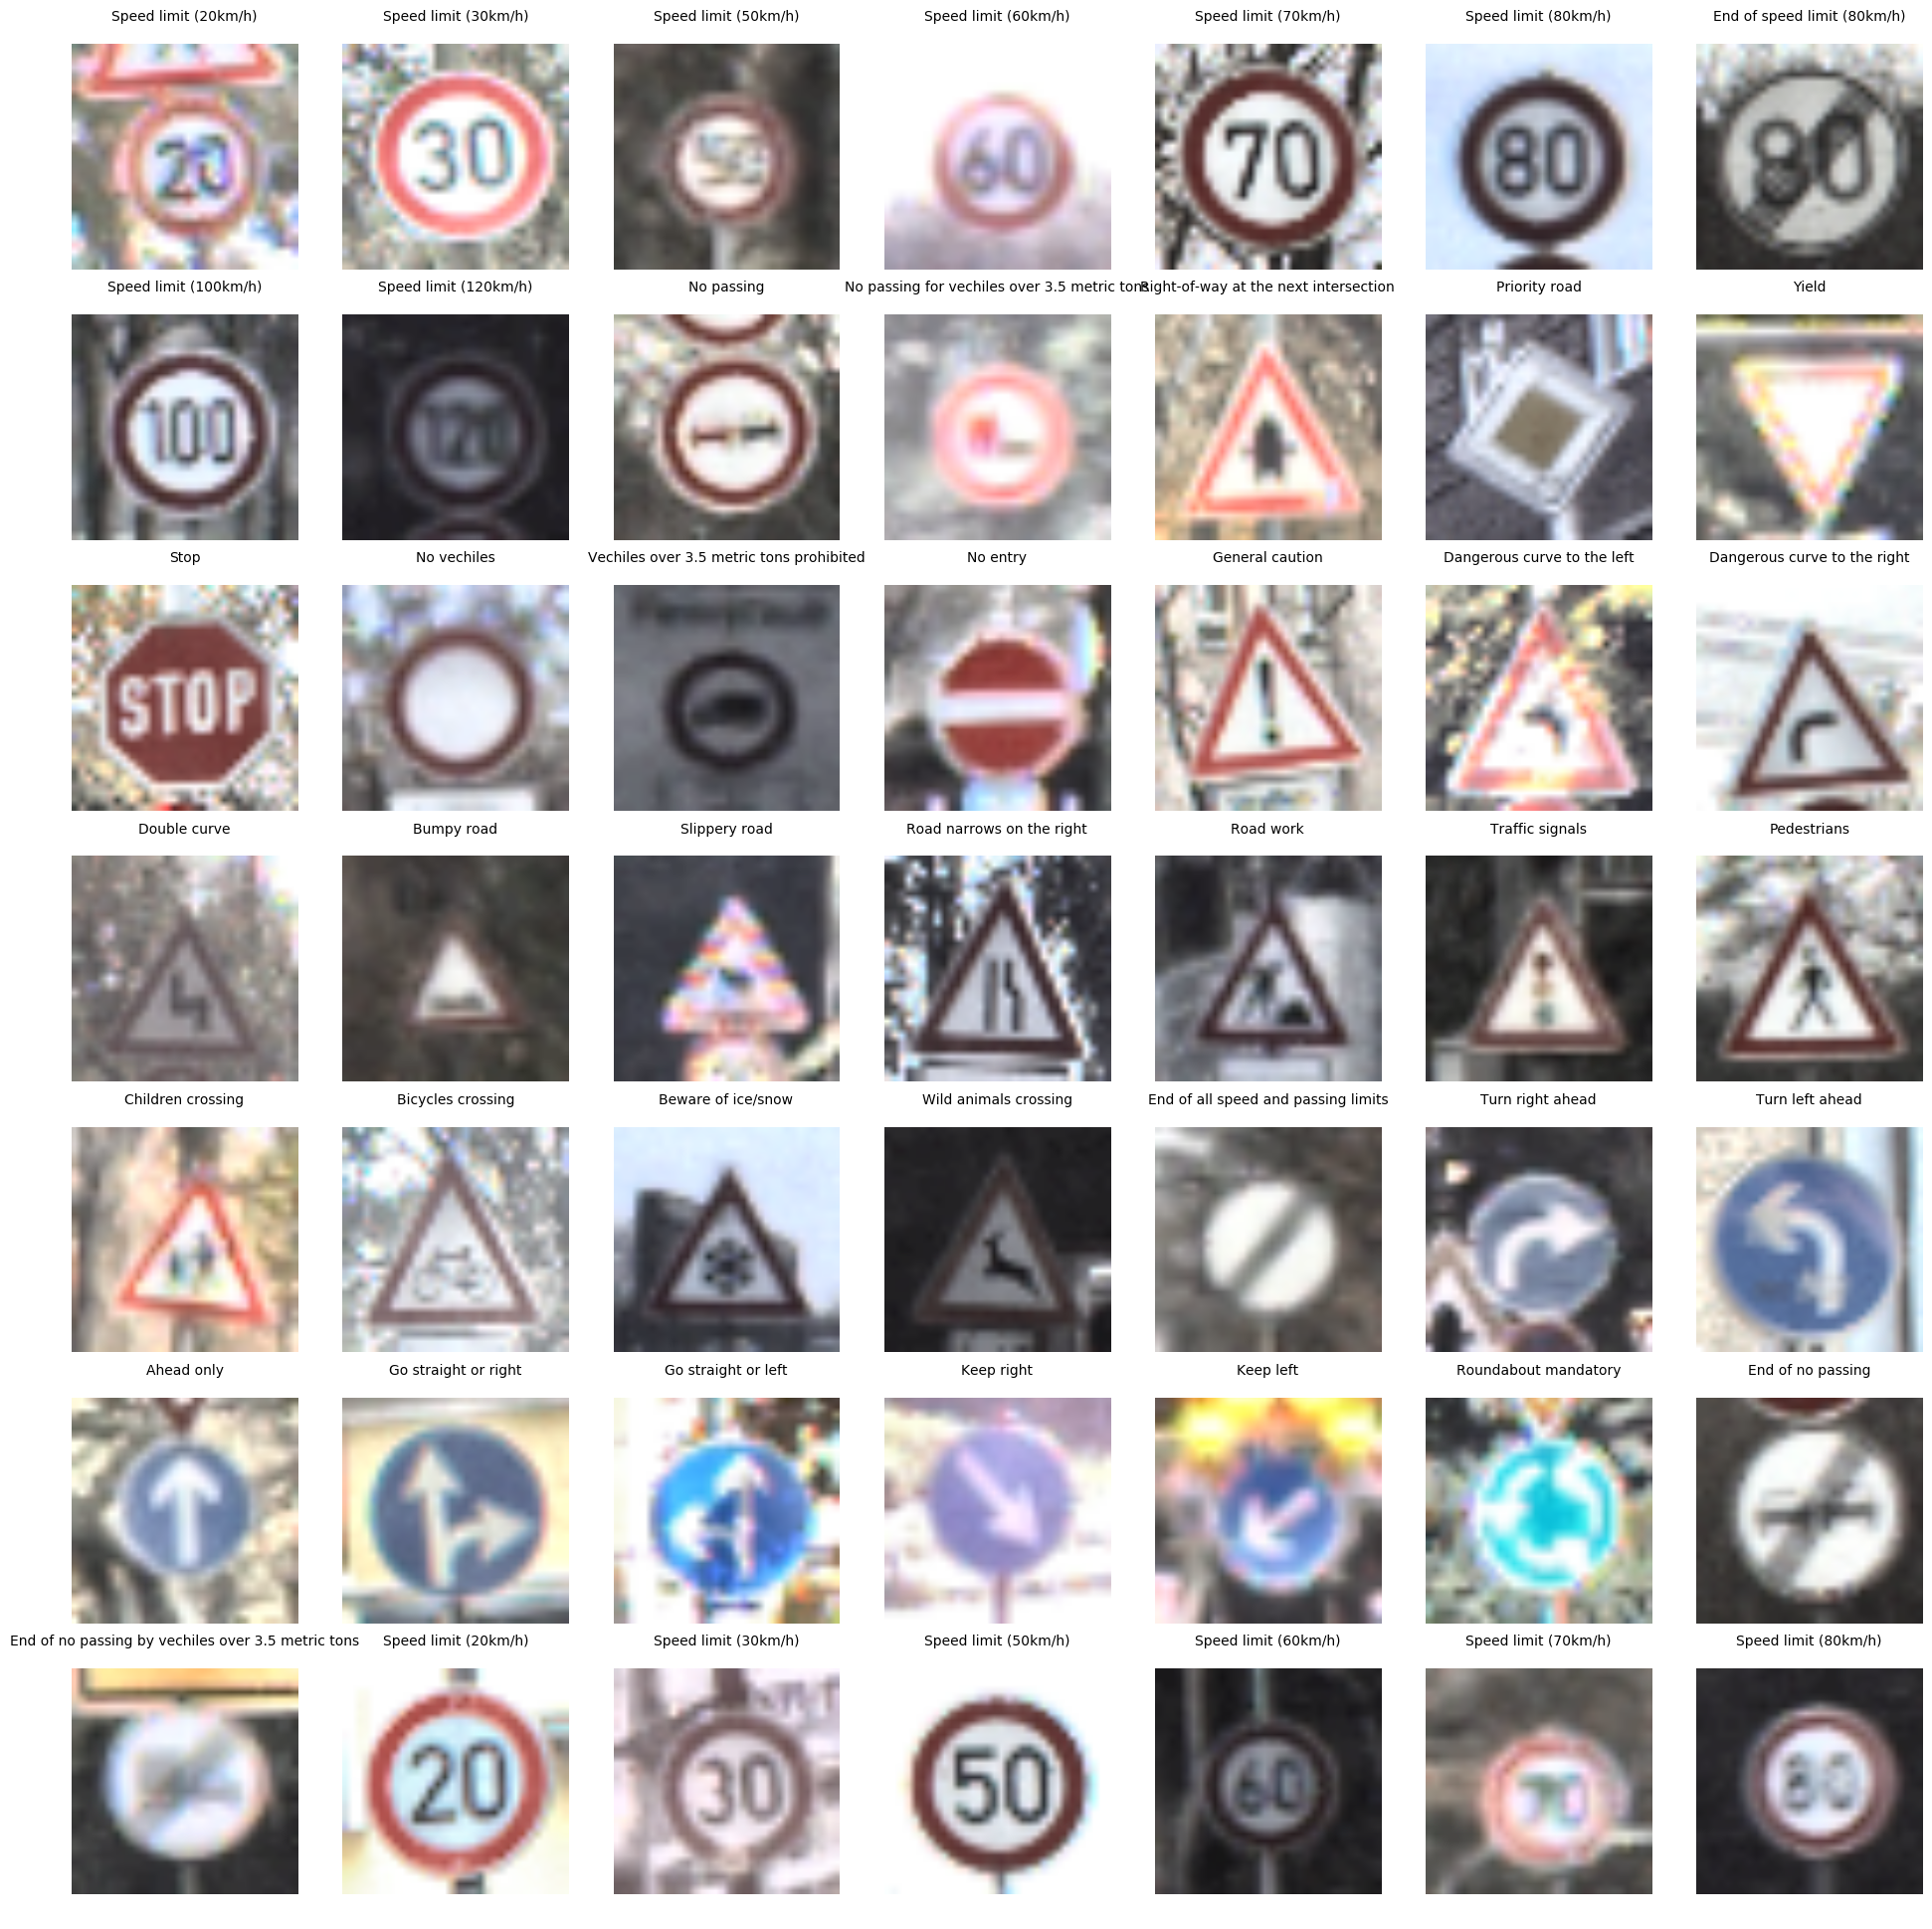

In [9]:
# Plot traffic sign after processing
fig, axes = plt.subplots(7,7, figsize = (24, 24))
plt.axis('off')
for i in range(49):
    idx = np.random.choice(indices_of_label[i%43])
    axes.flat[i].imshow(X_train[idx])
    axes.flat[i].set_title(sign_name[i%43], fontsize = 10)
    axes.flat[i].axis('off')

In [10]:
### Preprocess the data here.

def train_val_split(X_train, y_train, num_val = 0.2):
    '''Creat validation set by randomly taking 20% of each sign in the train set  
    '''
    indices_of_val = []
    indices_of_train = []
    for i in range(43):
        l = len(indices_of_label[i])
        split_point = int(num_val*l)
        np.random.shuffle(indices_of_label[i])
        indices_of_val += list(indices_of_label[i][:split_point])
        indices_of_train += list(indices_of_label[i][split_point:])
    X_val = X_train[indices_of_val]
    y_val = y_train[indices_of_val]
    X_train_new = X_train[indices_of_train]
    y_train_new = y_train[indices_of_train]
    return X_train_new, y_train_new, X_val, y_val

X_train, y_train, X_val, y_val = train_val_split(X_train, y_train)
print('Num train = ', len(y_train))
print('Num val = ', len(y_val))

Num train =  31368
Num val =  7841


In [11]:
# Convert label to one-hot representation
def to_one_hot(y):
    n_sample = len(y)
    one_hot = np.zeros((n_sample, 43), np.float32)
    one_hot[np.arange(n_sample), y] = 1
    return one_hot

y_train, y_val, y_test = to_one_hot(y_train), to_one_hot(y_val), to_one_hot(y_test)

### Train model without making data balance and generating more data

In [12]:
import tensorflow as tf
import numpy as np



def _variable_with_weight_decay(name, shape, wd):
    """Helper to create an initialized Variable with Xavier initiation and weight decay.

    Args:
        name: name of the variable
        shape: list of ints
        wd: add L2Loss weight decay multiplied by this float

    Returns:
        Variable Tensor
    """
    var = tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())

    #if wd is not None:
    weight_decay = tf.mul(tf.nn.l2_loss(var), wd, name='weight_loss')
    tf.add_to_collection('losses', weight_decay)

    return var

def _bias_variable(dim, name = 'biases'):
    """Helper to create bias
    """    
    return tf.get_variable(name, [dim], initializer=tf.constant_initializer(0.0), dtype=tf.float32)

def batch_norm(input, is_training):
    """Helper to create batch normalization layer following by an activation function ReLu 
    """
    bn = tf.contrib.layers.batch_norm(input, is_training=is_training, decay=0.9, center=True, scale=True,
                                      activation_fn=tf.nn.relu, updates_collections=None)
    return bn

def block(input, d_in, d_out, i, is_training):
    """ A block is created by concatenating of two convolution sequences following by a dropout 
    """
    with tf.variable_scope('layer{}'.format(i)) as scope:
        if not is_training:
            tf.get_variable_scope().reuse_variables()

        with tf.variable_scope('conv1') as scope:
            kernel = _variable_with_weight_decay('weights',
                                                 shape=[3, 3, d_in, d_out//2],
                                                 wd=0.0)
            conv = tf.nn.conv2d(input, kernel, [1, 1, 1, 1], padding='SAME')
            biases = _bias_variable(d_out//2)
            pre_activation = tf.nn.bias_add(conv, biases)
            conv1 = batch_norm(pre_activation, is_training)

        with tf.variable_scope('conv2') as scope:
            kernel1 = _variable_with_weight_decay('weights_1',
                                                  shape=[3, 3, d_in, d_out//2],
                                                  wd=0.0)
            conv2_1 = tf.nn.conv2d(input, kernel1, [1, 1, 1, 1], padding='SAME')
            biases1 = _bias_variable(d_out//2, name = 'biases1')
            pre_activation2_1 = tf.nn.bias_add(conv2_1, biases1)
            conv2_1 = batch_norm(pre_activation2_1, is_training)


            kernel2 = _variable_with_weight_decay('weights_2',
                                                  shape=[3, 3, d_out//2, d_out//2],
                                                  wd=0.0)
            conv2_2 = tf.nn.conv2d(conv2_1, kernel2, [1, 1, 1, 1], padding='SAME')
            biases2 = _bias_variable(d_out//2, name = 'biases2')
            pre_activation2_2 = tf.nn.bias_add(conv2_2, biases2)
            conv2_2 = batch_norm(pre_activation2_2, is_training)


        # Concatenate
        layer = tf.concat(3, [conv1, conv2_2])

        # pool1
        pool = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                               padding='SAME', name='pool{}'.format(i))

        if is_training:
            pool = tf.nn.dropout(pool, 0.5)
        else:
            pool = tf.nn.dropout(pool, 1.0)
    return pool

def fc(input, d_out, i, flatten, is_training):
    """Fully connected layer
    """
    with tf.variable_scope('fc{}'.format(i)) as scope:
        if not is_training:
            tf.get_variable_scope().reuse_variables()
        # Move everything into depth so we can perform a single matrix multiply.
        if flatten:
            dim = np.prod(input.get_shape().as_list()[1:])
            input = tf.reshape(input, [-1, dim])
        dim = input.get_shape()[-1].value
        weights = _variable_with_weight_decay('weights', shape=[dim, d_out], wd=0.004)
        biases = _bias_variable(d_out)
        pre_activation = tf.matmul(input, weights) + biases
        bn = batch_norm(pre_activation, is_training)

        if is_training:
            bn = tf.nn.dropout(bn, 0.5)
        else:
            bn = tf.nn.dropout(bn, 1.0)

    return(bn)

def softmax(input, flatten, is_training):
    """ softmax layer
    """
    if flatten:
        dim = np.prod(input.get_shape().as_list()[1:])
        input = tf.reshape(input, [-1, dim])
    with tf.variable_scope('softmax_linear') as scope:
        if not is_training:
            tf.get_variable_scope().reuse_variables()
        dim = input.get_shape()[-1].value
        weights = _variable_with_weight_decay('weights', [dim, 43], wd=0.0)
        biases = _bias_variable(43)
        softmax_linear = tf.add(tf.matmul(input, weights), biases, name=scope.name)

    return softmax_linear



def inference(x, is_training):
    """Build the model.

    Args:
        images: Images returned from input_train() or input_test()
        is_training : boolean

    Returns:
        Logits.
    """
    # bloc1
    bn1 = block(x, 3, 128, 1, is_training)
    # bloc2
    bn2 = block(bn1, 128, 256, 2, is_training)
    #bloc3
    bn3 = block(bn2, 256, 512, 3, is_training)
    # fc4
    bn4 = fc(bn3, 1024, 5, True, is_training)
    # softmax
    softmax_linear = softmax(bn4, False, is_training)

    return softmax_linear


In [13]:
# Constant
cropped_height = 28
cropped_width = 28
min_queue_examples = 10000
batch_size = 512
image_size = 32
c_classes = 43
init_learning_rate = 0.001
decay_steps = 100
decay_rate = 0.9
n_classes = 43
summaries_dir = './summary'
max_step = 4000
display_step = 40 

In [14]:
def distorted_train(x):
    """ Image processing for training:
        Input: single image
        return: image after processing
    """
    # Covert dtype to float
    reshaped_image = tf.cast(x, tf.float32)

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(reshaped_image, [cropped_height, cropped_width, 3])
    
    # Randomly adjust brightness and contrast
    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    distorted_image = tf.image.per_image_standardization(distorted_image)

    return distorted_image

def distorted_test(x):
    """ Image processing for training:
        Input: single image
        return: image after processing
    """
    # Covert dtype to float
    reshaped_image = tf.cast(x, tf.float32)

    # Crop the central [height, width] of the image.
    resized_image = tf.image.resize_image_with_crop_or_pad(reshaped_image, cropped_width, cropped_height)

    # Subtract off the mean and divide by the variance of the pixels.
    normalized_image = tf.image.per_image_standardization(resized_image)

    return normalized_image

    """ 
    The two functions below takes whole dataset (train, val or test), 
    put each image and label in the dataset to a queue, 
    process each image and return a batch of image and label.
    """

def input_train(x,y):
    input_queue = tf.train.slice_input_producer([x, y], shuffle=False)
    distorted_x = distorted_train(input_queue[0])

    images, label_batch = tf.train.shuffle_batch(
        [distorted_x, input_queue[1]],
        batch_size=batch_size,
        num_threads=8,  
        capacity=min_queue_examples + 3 * batch_size,
        min_after_dequeue=min_queue_examples)

    return images, label_batch

def input_test(x,y, num_split = 3):
    test_size = x.shape[0]
    test_batch_size = (test_size +num_split -1) // num_split
    input_queue = tf.train.slice_input_producer([x, y], shuffle=False)
    distorted_x = distorted_test(input_queue[0])

    images, label_batch = tf.train.batch(
        [distorted_x, input_queue[1]],
        batch_size=test_batch_size,
        capacity= test_batch_size,
        allow_smaller_final_batch = True)

    return images, label_batch

In [15]:
def loss_n_accuracy(x,y, soft_max, is_training):
    if is_training:
        s = 'train_'
    else:
        s = 'val_'
    with tf.variable_scope(s + 'loss') as scope:
        cross_entropy_mean = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(soft_max, y))
        tf.add_to_collection('losses', cross_entropy_mean)
        loss = tf.add_n(tf.get_collection('losses'), name='total_loss')
        tf.summary.scalar('cross_entropy_mean', cross_entropy_mean)
        tf.summary.scalar('loss', loss)
        
    with tf.variable_scope(s + 'accuracy') as scope:
        correct_pred = tf.equal(tf.argmax(soft_max, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
        tf.summary.scalar('accuracy', accuracy)
    return loss, accuracy

In [16]:
train_batch, train_label = input_train(X_train, y_train)
train_soft_max = inference(train_batch, True)
train_loss, train_accuracy = loss_n_accuracy(train_batch,train_label,train_soft_max, True)

val_batch, val_label = input_test(X_val, y_val, num_split = 2)
val_soft_max = inference(val_batch, False)
val_loss, val_accuracy = loss_n_accuracy(val_batch, val_label, val_soft_max, False)

test_batch, test_label = input_test(X_test, y_test)
test_soft_max = inference(test_batch, False)
test_loss, test_accuracy = loss_n_accuracy(test_batch, test_label, test_soft_max, False)

In [17]:
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(init_learning_rate, global_step, decay_steps, decay_rate, True)
tf.summary.scalar('larning_rate', learning_rate)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(train_loss, global_step)

merged = tf.summary.merge_all()
saver = tf.train.Saver()

In [23]:
import time
import os
import shutil
# Delete summary directory every time re_train model 
if os.path.exists(summaries_dir):
    shutil.rmtree(summaries_dir)

def train():
    with tf.Session() as sess:
        start = time.time()
        sess.run(tf.global_variables_initializer())

        train_writer = tf.train.SummaryWriter(summaries_dir, sess.graph)
        
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord, sess=sess)

        n_sample = X_train.shape[0]
        for step in range(1, max_step+1):
            
            epoch = step*batch_size // n_sample + 1 
            summary, batch_loss, batch_acc, val_l, val_a, lr, _ = sess.run(
                [merged, train_loss, train_accuracy, val_loss, val_accuracy, learning_rate, train_step])

            train_writer.add_summary(summary, step)
            
            if step % display_step == 0:
                print('Epoch:{0:>4}  step: {1:>5}  batch_loss: {2:6.4f}  batch_acc: {3:5.3f}  val_loss: {4:6.4f}  val_acc: {5:5.3f}  learning_rate: {6:7.6f}  time: {7:7}'.format(epoch, step, batch_loss, batch_acc, val_l, val_a, lr, round(time.time() - start) ) )
                
        saver.save(sess, './model.ckpt')

        coord.request_stop()
        coord.join(threads)
train()


Epoch:   1  step:    40  batch_loss: 7.0718  batch_acc: 0.232                val_loss: 14.7645  val_acc: 0.277  learning_rate: 0.001000                time:     116
Epoch:   2  step:    80  batch_loss: 3.9993  batch_acc: 0.621                val_loss: 8.6367  val_acc: 0.504  learning_rate: 0.001000                time:     220
Epoch:   2  step:   120  batch_loss: 3.1603  batch_acc: 0.668                val_loss: 5.5277  val_acc: 0.914  learning_rate: 0.000900                time:     324
Epoch:   3  step:   160  batch_loss: 2.0722  batch_acc: 0.840                val_loss: 3.9534  val_acc: 0.910  learning_rate: 0.000900                time:     428
Epoch:   4  step:   200  batch_loss: 1.5244  batch_acc: 0.891                val_loss: 2.9829  val_acc: 0.921  learning_rate: 0.000900                time:     532
Epoch:   4  step:   240  batch_loss: 1.2759  batch_acc: 0.871                val_loss: 2.2436  val_acc: 0.983  learning_rate: 0.000810                time:     636
Epoch:   5  ste

In [25]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./model.ckpt")
    print("Model restored.")
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord, sess=sess)
    test_losses = []
    test_accuracies = []

    for i in range(3):
        test_batch_loss, test_batch_acc = sess.run([test_loss, test_accuracy])
        test_losses.append(test_batch_loss)
        test_accuracies.append(test_batch_acc)

    total_test_loss = np.mean(test_losses)
    total_test_acc = np.mean(test_accuracies)
    print('Test_loss: ', total_test_loss, ' Test_acc', total_test_acc)
    
    coord.request_stop()
    coord.join(threads)
    

Model restored.
Test_loss:  0.146925  Test_acc 0.989153


### Tensorboard:
To run TensorBoard, use the following command

`tensorboard --logdir=./summary`

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.